In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem type 1: Focusing on Data Modelling. 
### Topic Clustering and Classification
#### Dataset: Online Shoppers Purchasing Intention Dataset Data Set.
#### Link dataset: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
* **`Administrative, "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"`**: represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
* **`The "Bounce Rate", "Exit Rate" and "Page Value"`** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* **`"Bounce Rate"`**: feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* **`"Exit Rate"`**: feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
* **`"Page Value"`**: feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
* **`"Special Day"`** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.




# Retrieving and Preparing the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [65]:
# Checking count of negative values in ProductRelated
data.loc[data['ProductRelated'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Administrative_Duration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Informational,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Informational_Duration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductRelated,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductRelated_Duration,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BounceRates,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExitRates,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PageValues,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpecialDay,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observation 1 - Dataset shape
Dataset has 12330 rows and 18 columns, with no missing values.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


,Total,Percent
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0


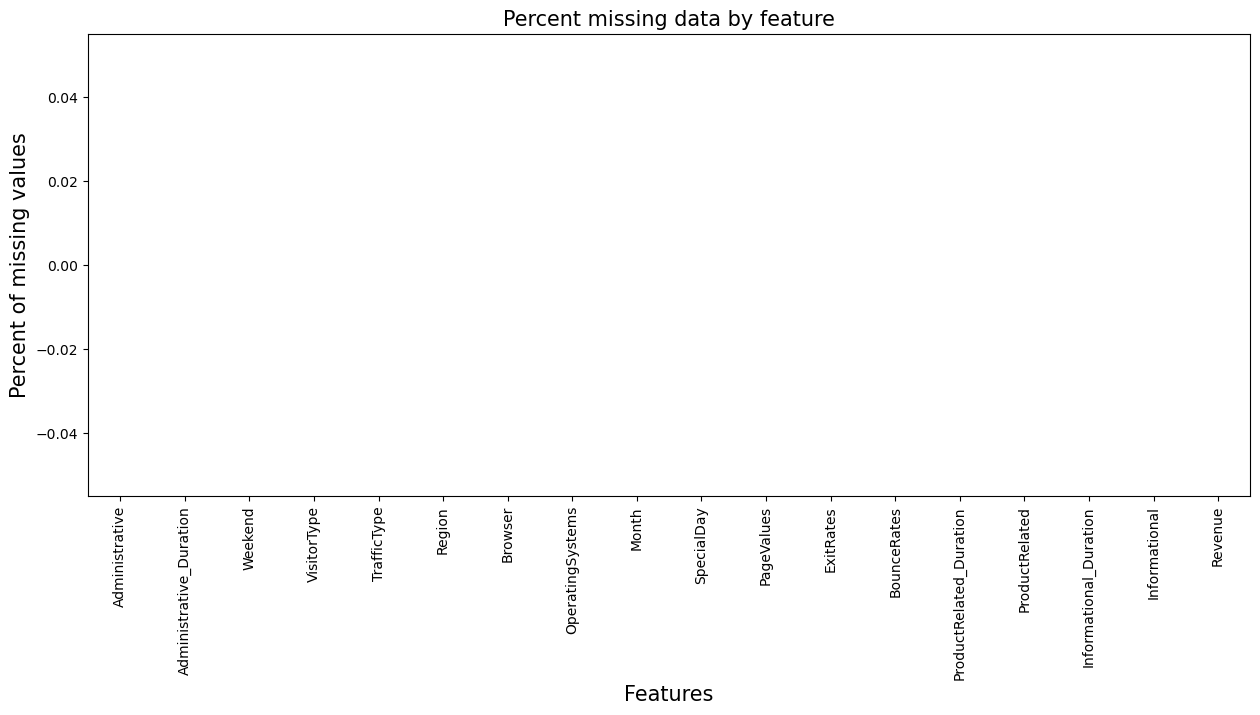

In [62]:
#check percent and total  missing data

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()


In [6]:
# the number of unique values in a column
for col in data.columns:
    print(col, data[col].value_counts().count())

Administrative 27
Administrative_Duration 3335
Informational 17
Informational_Duration 1258
ProductRelated 311
ProductRelated_Duration 9551
BounceRates 1872
ExitRates 4777
PageValues 2704
SpecialDay 6
Month 10
OperatingSystems 8
Browser 13
Region 9
TrafficType 20
VisitorType 3
Weekend 2
Revenue 2


#### Observation 2 - information on the type of variable and min-max values
* **`Administrative`**: categorical, with lowest being 0 and highest being 27
* **`Administrative_Duration`**: numberic with lowest being 0 and highest being 3398.75
* **`Informational`**: categorical, with lowest being 0 and highest being 24
* **`Informational_Duration`**: numberic with lowest being 0 and highest being 2549.375
* **`ProductRelated`**: categorical, with lowest being 0 and highest being 705
* **`ProductRelated_Duration`**: numberic with lowest being 0 and highest being 63973.522
* **`BounceRate`**: numberic with lowest being 0 and highest being 0.2
* **`ExitRate`**: numberic with lowest being 0 and highest being 0.2
* **`PageValue`**: numberic with lowest being 0 and highest being 361.763742
* **`SpecialDay`**: categorical (binary). If indicates the closeness of the site visiting time to a specific special day then 1 else 0.
* **`OperatingSystems`**: categorical with 8 type of operating system
* **`Browser`**: categorical with 13 type broswer
* **`Region`**: categorical with 9 region
* **`TrafficType`**: categorical with 20 type of traffic

In [7]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

c:\Users\tanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

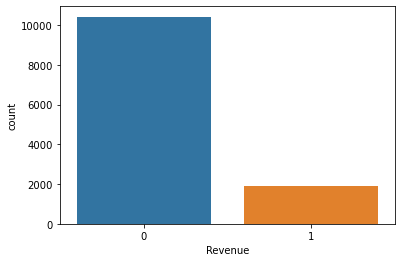

In [50]:
# distribution of the target variable
sns.countplot(data['Revenue'])

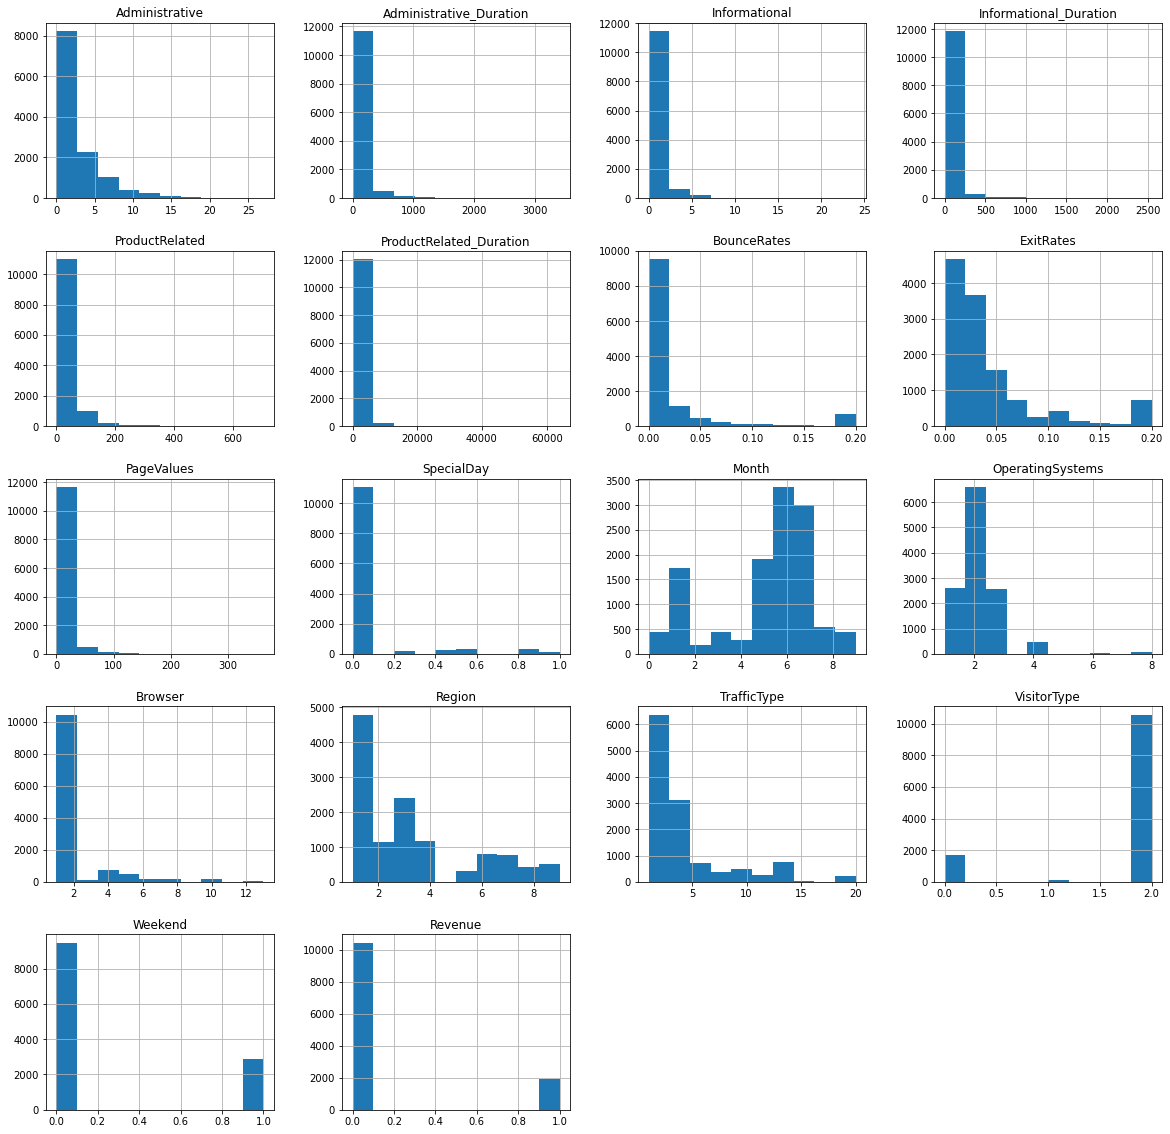

In [52]:
# distribution features in the dataset
data.hist(figsize=(20,20))
plt.show()


Text(0.5, 1.0, 'Administrative')

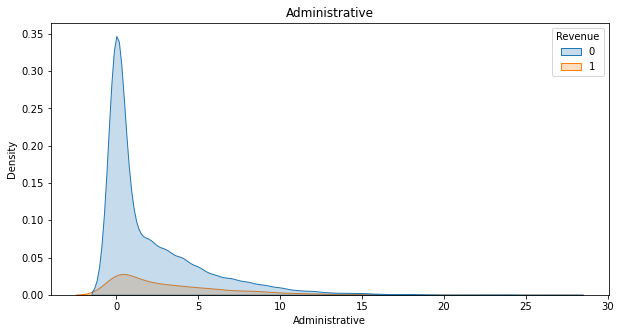

In [72]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data, x = 'Administrative', hue = 'Revenue', shade=True)
plt.title('Administrative')


Text(0.5, 1.0, 'Month')

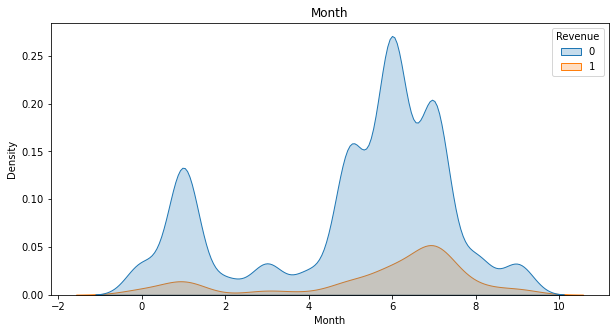

In [71]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data, x = 'Month', hue = 'Revenue', shade=True)
plt.title('Month')

Text(0.5, 1.0, 'Region')

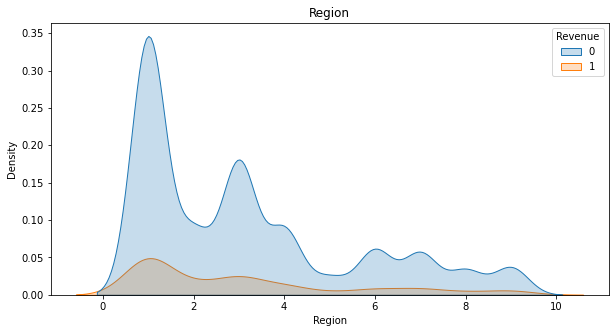

In [73]:
plt.figure(figsize=(10,5))
sns.kdeplot(data = data, x = 'Region', hue = 'Revenue', shade=True)
plt.title('Region')

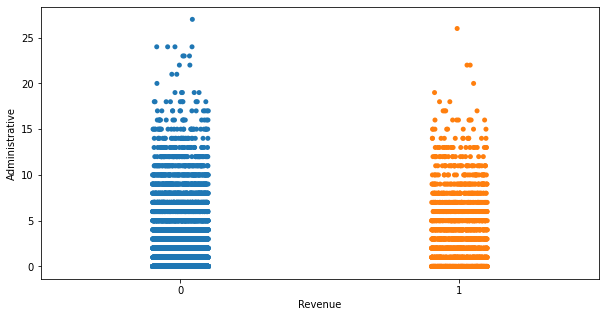

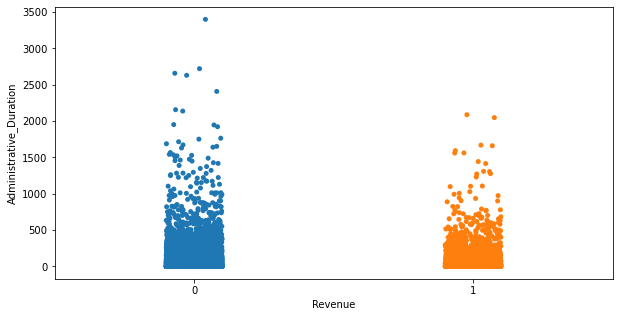

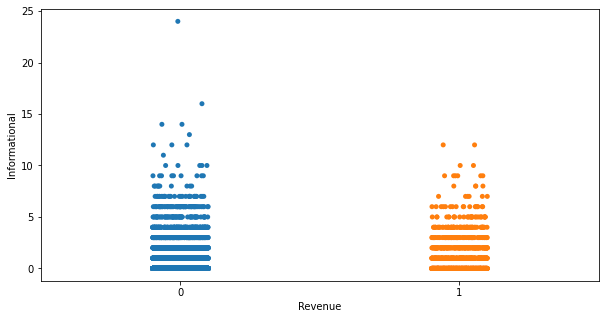

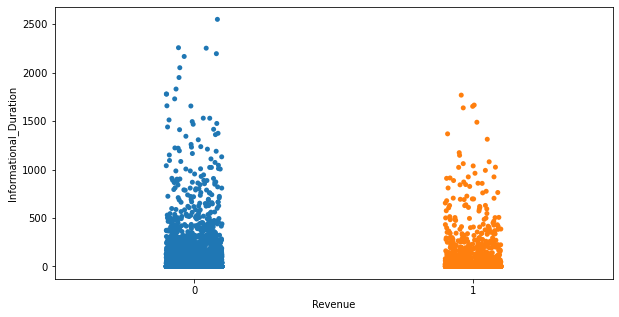

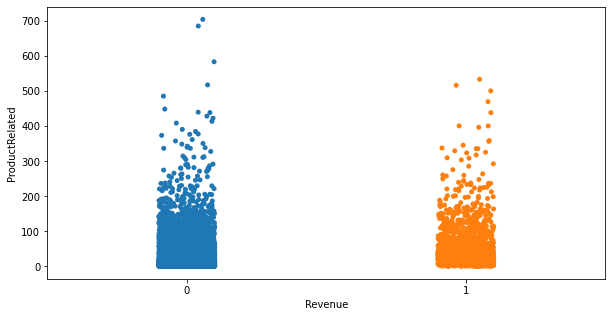

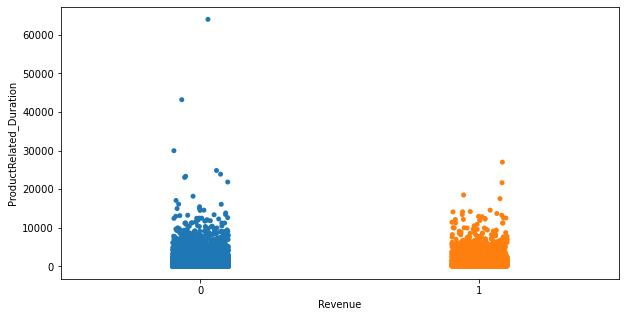

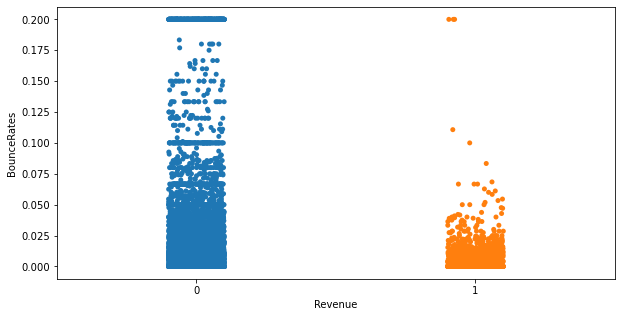

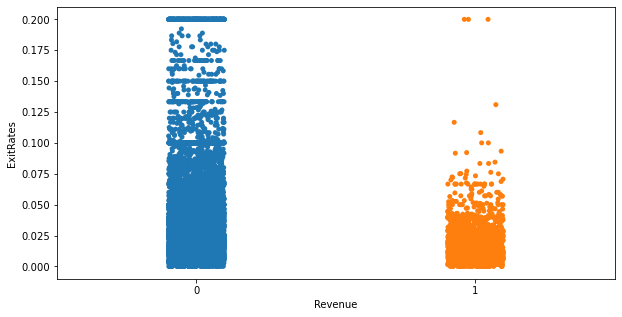

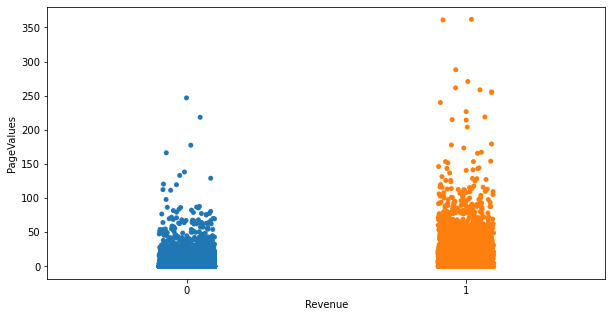

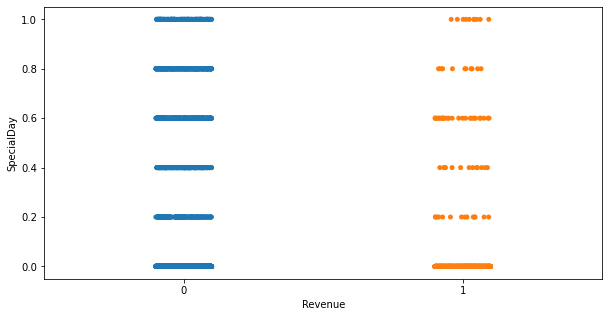

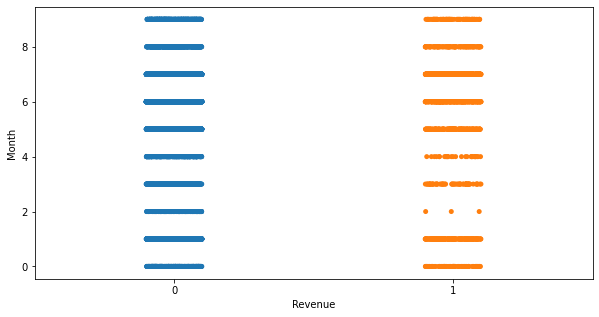

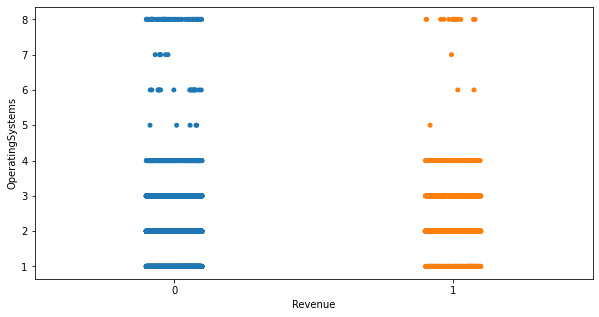

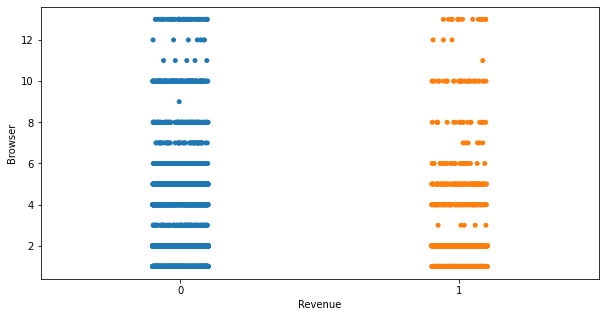

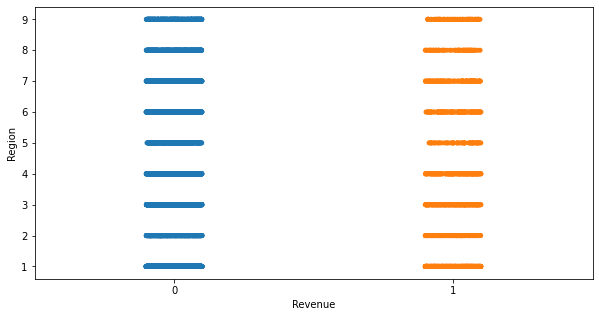

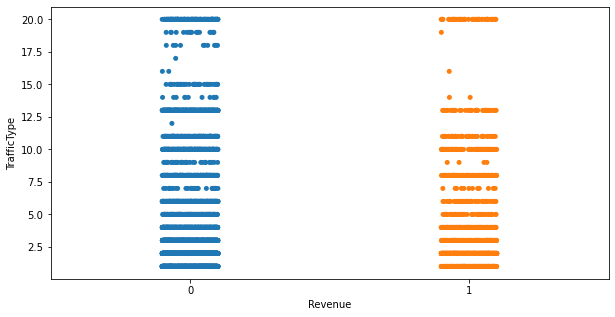

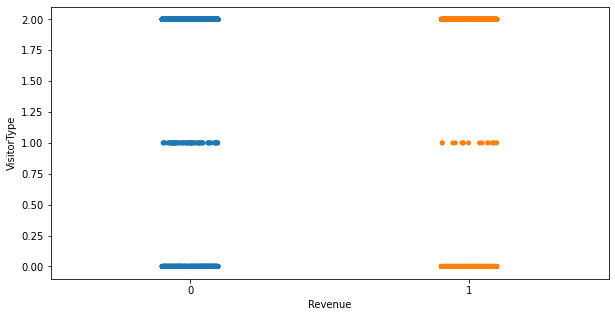

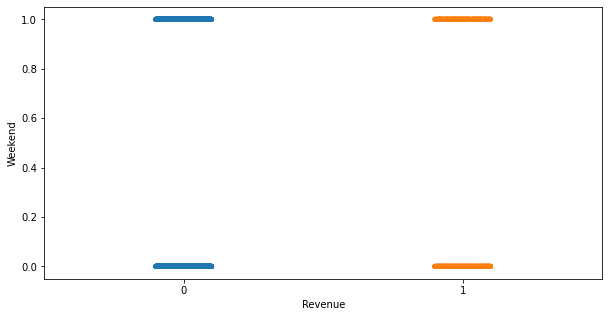

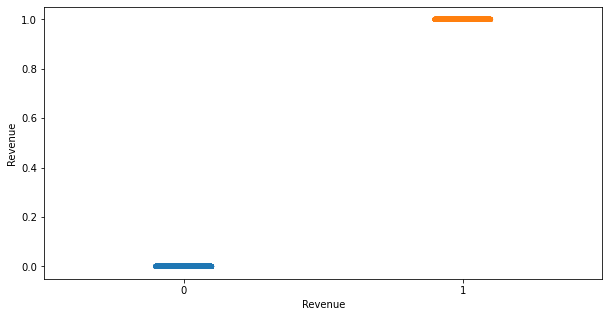

In [80]:
# stripplot all features in the dataset
for col in data.columns:
    plt.figure(figsize=(10,5))
    sns.stripplot(data = data, x = 'Revenue', y = col)
    plt.show()
    

C:\Users\tanki\AppData\Local\Temp\ipykernel_3896\3895997034.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


Text(0.5, 1.0, 'Correlation Matrix of Data')

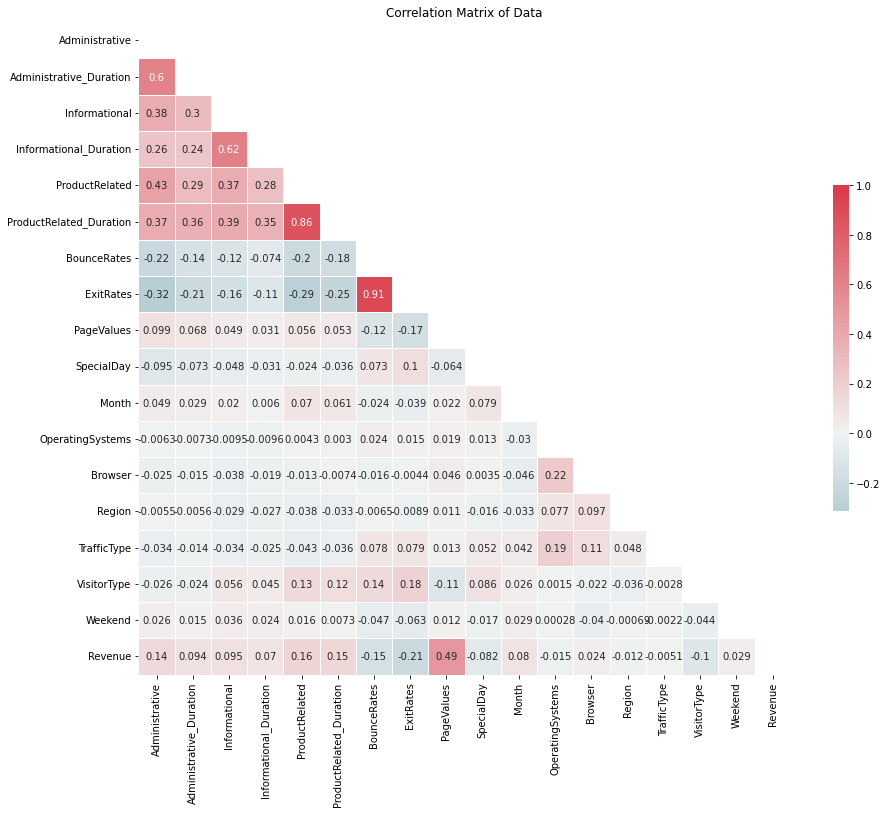

In [10]:
corr = data.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 12))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [12]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

ExitRates                BounceRates                0.913004
BounceRates              ExitRates                  0.913004
ProductRelated           ProductRelated_Duration    0.860927
ProductRelated_Duration  ProductRelated             0.860927
Informational            Informational_Duration     0.618955
Informational_Duration   Informational              0.618955
Administrative           Administrative_Duration    0.601583
Administrative_Duration  Administrative             0.601583
dtype: float64

In [16]:
# Absolute correlation of independent variables with 'Revenue' i.e. the target variable
absCorrwithDep = []
allVars = data.drop('Revenue', axis=1).columns

for var in allVars:
    absCorrwithDep.append(abs(data['Revenue'].corr(data[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,PageValues,0.492569
7,ExitRates,0.207071
4,ProductRelated,0.158538
5,ProductRelated_Duration,0.152373
6,BounceRates,0.150673
0,Administrative,0.138917
15,VisitorType,0.104726
2,Informational,0.0952
1,Administrative_Duration,0.093587
9,SpecialDay,0.082305


#### Observation 6 - Correlation matrix
* **`BounceRates and ExitRates`**; **`ProductRelated_Duration and ProductRelated`** are highly correlated with each other, as noted earlier during the EDA as well.
* **`Informational_Duration and Informational`**; **`Administrative and Administrative_Duration`** are moderately correlated with each other.
* As we know that if a variable has a very low correlation with the target variable it's not going to be useful for the model prediction. We dropping **`TrafficType`** since these columns also have relatively less correlation with the target column.



# Modeling

In [28]:
X = data.drop(['Revenue', 'TrafficType'], axis = 1, inplace = False)
y = data['Revenue']

In [29]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9864, 16) (2466, 16) (9864,) (2466,)


## Classification

### Model 1: random forest

Accuracy Score:  0.8896999188969992
Confusion Matrix: 
 [[1967   77]
 [ 195  227]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2044
           1       0.75      0.54      0.63       422

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



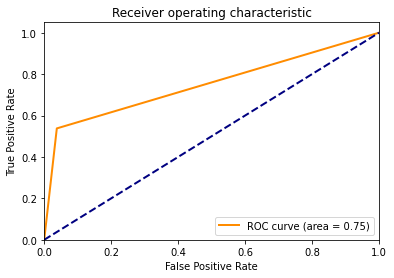

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# plot AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()


### Model 2: Logistic regression

Accuracy Score:  0.8661800486618005
Confusion Matrix: 
 [[1989   55]
 [ 275  147]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2044
           1       0.73      0.35      0.47       422

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466



c:\Users\tanki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


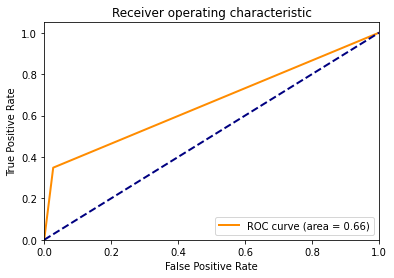

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# plot AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

## Clustering

### Model 3: K-nearest neighbors

Accuracy Score:  0.851581508515815
Confusion Matrix: 
 [[1981   63]
 [ 303  119]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2044
           1       0.65      0.28      0.39       422

    accuracy                           0.85      2466
   macro avg       0.76      0.63      0.65      2466
weighted avg       0.83      0.85      0.83      2466



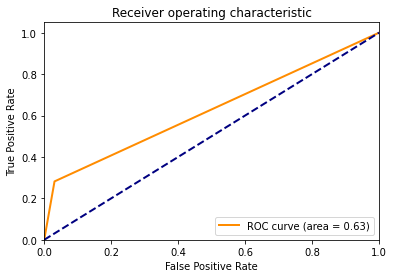

In [48]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# plot AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()


### Model 4: K-means

Accuracy Score:  0.8073803730738037
Confusion Matrix: 
 [[1929  115]
 [ 360   62]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2044
           1       0.35      0.15      0.21       422

    accuracy                           0.81      2466
   macro avg       0.60      0.55      0.55      2466
weighted avg       0.76      0.81      0.77      2466



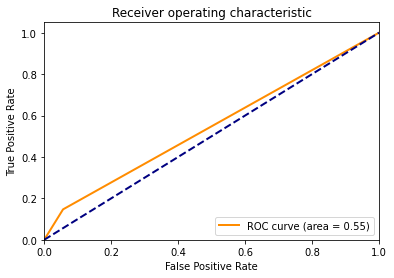

In [53]:
# K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# plot AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

### Conclusion and understanding of models results

The confusion matrix is another metric that is often used to measure the performance of a classification algorithm, which contains information about the actual and the predicted class.

Metrics that can be calculated from confusion matrix:
* **Precision**: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
* **Recall**: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **f1-score**: Harmonic mean of precision and recall.
The confusion matrix for class 1 (Accepted) would look like:

|                        | Predicted: 0 (Not Accepted) | Predicted: 1 (Accepted)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Accepted)**| True Negatives              | False Positives        |
|**Actual: 1 (Accepted)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.**
* **Recall would tell us cases where actually the personal was accepted by the customer but we predicted it as not accepted.**

In our case, it would be recall that would hold more importance then precision. So choosing recall and f1-score which is the harmonic mean of both precision and recall as evaluation metric, particularly for class 1.

Further, AUC-ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, higher the AUC, better the model is at distinguishing between people accepting the loan and people not accepting the loan offered by the bank [source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).


Thus based on our evaluation metric, the scores of the models we tried are as below:

| Models      | Recall Score for Class 1 (%) | f1-score for Class 1 (%) | ROC AUC (%) | Accuracy (%) |
|-------------|--------------------------|----------------------|-----|----|
| **1. Random Forest** | 54 | 63 | 75 | 89 |
| **2. Logistic Regression** | 35 | 47 | 66 | 86 |
| **3. k-Nearest Neighbor** | 28 | 39 | 63 | 85 |
| **4. k-Means** | 15 | 21 | 55 | 80 |

It can be seen that **Model 1** gives a better measures overall against others. 